In [51]:
import sqlite3
import pandas as pd
import tempun 
import geopandas as gpd
import re
import matplotlib.pyplot as plt

In [86]:
greek_world_gdf = gpd.read_file("greek_world_gdf.geojson", driver="GeoJSON")
greek_world_uu = greek_world_gdf.geometry.unary_union

latin_world_gdf = gpd.read_file("latin_world_gdf.geojson", driver="GeoJSON")
latin_world_uu = latin_world_gdf.geometry.unary_union

In [2]:
conn = sqlite3.connect('large_files/cultura_12_2024.db')

# Chose a table to extract
table_name = 'individuals_main_information'

# Load the table as a pandas DataFrame
cultura = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

In [65]:
cultura.shape

(220505, 11)

In [66]:
cultura.head(10)

,individual_wikidata_id,individual_name,birthyear,individual_impact_years,country_code,country_name,wikipedia_cultural_score,identifier_score,not_before,not_after,random_dates
0,Q55844134,Ernst von Heeringen,1810.0,1820-1870,None,None,NaN,6.0,1820,1870,"[1861, 1829, 1829, 1853, 1852, 1848, 1846, 184..."
1,Q202809,Frederick Coombs,1803.0,1810-1860,GBR,United Kingdom,0.102597,12.0,1810,1860,"[1828, 1846, 1837, 1831, 1852, 1855, 1857, 185..."
2,Q94835418,Georg Kurtscholz,1847.0,1860-1910,None,None,NaN,4.0,1860,1910,"[1867, 1902, 1890, 1889, 1861, 1896, 1871, 186..."
3,Q33934701,Margarethe Sömmering,1768.0,1780-1830,None,None,0.100135,1.0,1780,1830,"[1805, 1789, 1791, 1804, 1821, 1804, 1794, 179..."
4,Q4350107,Vassili Perevoštšikov,1785.0,1800-1850,RUS,Russia,0.101319,4.0,1800,1850,"[1839, 1843, 1805, 1815, 1833, 1841, 1837, 183..."
5,Q1028749,Christian Friedrich Zincke,1683.0,1690-1740,GBR,United Kingdom,0.100409,37.0,1690,1740,"[1734, 1711, 1695, 1740, 1738, 1706, 1716, 171..."
6,Q2822993,Achard of Saint-Victor,1100.0,1110-1160,GBR,United Kingdom,0.101588,46.0,1110,1160,"[1120, 1141, 1111, 1158, 1113, 1124, 1156, 115..."
7,Q105607234,Angelo Dalbon,1787.0,1800-1850,ITA,Italy,0.100120,4.0,1800,1850,"[1838, 1831, 1841, 1825, 1801, 1838, 1814, 182..."
8,Q91771,Hans Krumpper,1570.0,1580-1630,DEU,Germany,0.101971,24.0,1580,1630,"[1580, 1603, 1624, 1612, 1625, 1611, 1603, 160..."
9,Q5362982,Elizabeth Hoby,1528.0,1540-1590,GBR,United Kingdom,0.101881,23.0,1540,1590,"[1581, 1588, 1576, 1568, 1578, 1587, 1547, 156..."


In [96]:

# Chose a table to extract
table_name = 'individuals_regions'
# Load the table as a pandas DataFrame
individuals_regions = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
individuals_regions.head(10)

,individual_wikidata_id,individual_name,region_code,region_name
0,Q202809,Frederick Coombs,re_british_islands,British Islands
1,Q1028749,Christian Friedrich Zincke,re_british_islands,British Islands
2,Q2822993,Achard of Saint-Victor,re_british_islands,British Islands
3,Q5362982,Elizabeth Hoby,re_british_islands,British Islands
4,Q246595,Joseph Smit,re_british_islands,British Islands
5,Q30611696,James Davies,re_british_islands,British Islands
6,Q6141543,James Quin,re_british_islands,British Islands
7,Q21455534,Alice Westlake,re_british_islands,British Islands
8,Q4889423,Benjamin Wrigglesworth Beatson,re_british_islands,British Islands
9,Q21457161,James Irvine,re_british_islands,British Islands


In [176]:
(individuals_regions["region_name"]=="Latin World").sum()

454

In [97]:
(individuals_regions["region_name"] == "Greek World").sum()

1690

In [98]:
cultura = cultura.merge(individuals_regions, how="outer", on="individual_wikidata_id")

In [99]:
cultura = cultura[cultura["individual_impact_years"].notnull()]

In [100]:
years = "-20-30"
re.search("(\-?\d+)(\-)(\-?\d+)", years).groups()

('-20', '-', '30')

In [101]:
cultura["not_before"] = cultura["individual_impact_years"].apply(
    lambda x: int(re.search("(\-?\d+)(\-)(\-?\d+)", x).groups()[0]))
cultura["not_after"] = cultura["individual_impact_years"].apply(
    lambda x: int(re.search("(\-?\d+)(\-)(\-?\d+)", x).groups()[2]))

In [17]:
cultura["random_dates"] = cultura.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=100), axis=1)

In [107]:
cultura.head(10)

,individual_wikidata_id,individual_name_x,birthyear,individual_impact_years,country_code,country_name,wikipedia_cultural_score,identifier_score,not_before,not_after,random_dates,birthyear_plus35,individual_name_y,region_code,region_name
0,Q55844134,Ernst von Heeringen,1810.0,1820-1870,None,None,NaN,6.0,1820,1870,"[1861, 1829, 1829, 1853, 1852, 1848, 1846, 184...",1845.0,NaN,NaN,NaN
1,Q202809,Frederick Coombs,1803.0,1810-1860,GBR,United Kingdom,0.102597,12.0,1810,1860,"[1828, 1846, 1837, 1831, 1852, 1855, 1857, 185...",1838.0,Frederick Coombs,re_british_islands,British Islands
2,Q202809,Frederick Coombs,1803.0,1810-1860,GBR,United Kingdom,0.102597,12.0,1810,1860,"[1828, 1846, 1837, 1831, 1852, 1855, 1857, 185...",1838.0,Frederick Coombs,re_northwestern_europe,Northwestern Europe
3,Q202809,Frederick Coombs,1803.0,1810-1860,GBR,United Kingdom,0.102597,12.0,1810,1860,"[1828, 1846, 1837, 1831, 1852, 1855, 1857, 185...",1838.0,Frederick Coombs,re_united_kingdom,United Kingdom
4,Q202809,Frederick Coombs,1803.0,1810-1860,GBR,United Kingdom,0.102597,12.0,1810,1860,"[1828, 1846, 1837, 1831, 1852, 1855, 1857, 185...",1838.0,Frederick Coombs,re_western_europe,Western Europe
5,Q94835418,Georg Kurtscholz,1847.0,1860-1910,None,None,NaN,4.0,1860,1910,"[1867, 1902, 1890, 1889, 1861, 1896, 1871, 186...",1882.0,NaN,NaN,NaN
6,Q33934701,Margarethe Sömmering,1768.0,1780-1830,None,None,0.100135,1.0,1780,1830,"[1805, 1789, 1791, 1804, 1821, 1804, 1794, 179...",1803.0,NaN,NaN,NaN
7,Q4350107,Vassili Perevoštšikov,1785.0,1800-1850,RUS,Russia,0.101319,4.0,1800,1850,"[1839, 1843, 1805, 1815, 1833, 1841, 1837, 183...",1820.0,Vassili Perevoštšikov,re_eastern_europe,Eastern Europe
8,Q4350107,Vassili Perevoštšikov,1785.0,1800-1850,RUS,Russia,0.101319,4.0,1800,1850,"[1839, 1843, 1805, 1815, 1833, 1841, 1837, 183...",1820.0,Vassili Perevoštšikov,re_slav_world,Slav world
9,Q1028749,Christian Friedrich Zincke,1683.0,1690-1740,GBR,United Kingdom,0.100409,37.0,1690,1740,"[1734, 1711, 1695, 1740, 1738, 1706, 1716, 171...",1718.0,Christian Friedrich Zincke,re_british_islands,British Islands


In [28]:
cultura_index = pd.read_csv("large_files/cultura_index_18032024.csv")
cultura_index.head(5)

,Unnamed: 0,decade,occupation,count_cps,N_est,lower,upper,region_name,model_type
0,0,840,Written work,1,12.737580,10.194953,15.478997,Central Europe,occupation_model
1,1,850,Written work,1,12.382427,9.965798,14.953926,Central Europe,occupation_model
2,2,960,Written work,1,9.182749,7.618665,10.865176,Central Europe,occupation_model
3,3,1040,Written work,1,8.341506,6.957368,9.794903,Central Europe,occupation_model
4,4,1080,Written work,1,8.414305,7.099336,9.812688,Central Europe,occupation_model


In [108]:
cultura["birthyear_plus35"] = cultura["birthyear"] + 35

In [182]:
cultura_greek_world = cultura[cultura["region_name"]=="Greek World"]
cultura_latin_world = cultura[cultura["region_name"]=="Latin World"]

In [189]:
greek_world_gdf.set_index("name", inplace=True)
latin_world_gdf.set_index("name", inplace=True)

In [184]:
country = "France"
not_before = -900
not_after = 250
(not_before <= greek_world_gdf.loc[country]["max_date"]) & (
        not_after >= greek_world_gdf.loc[country]["min_date"])

True

In [185]:
def filter_by_country_temporal_inclusion(row, countries_gdf):
    try:
        return (row["not_before"] <= countries_gdf.loc[row["country_name"]]["max_date"]) & (row["not_after"] >= countries_gdf.loc[row["country_name"]]["min_date"])
    except:
        return False

In [186]:
len(cultura_greek_world)

1690

In [187]:
cultura_greek_world = cultura_greek_world[cultura_greek_world.apply(lambda row: filter_by_country_temporal_inclusion(row, greek_world_gdf), axis=1)]
len(cultura_greek_world)

994

In [188]:
len(cultura_latin_world)

454

In [193]:
cultura_latin_world = cultura_latin_world[cultura_latin_world.apply(lambda row: filter_by_country_temporal_inclusion(row, latin_world_gdf), axis=1)]
len(cultura_latin_world)

454

In [162]:
# cultura_greek_world["identifier_score_norm"] = cultura_greek_world["identifier_score"] / cultura_greek_world["identifier_score"].max()

(-800.0, 500.0)

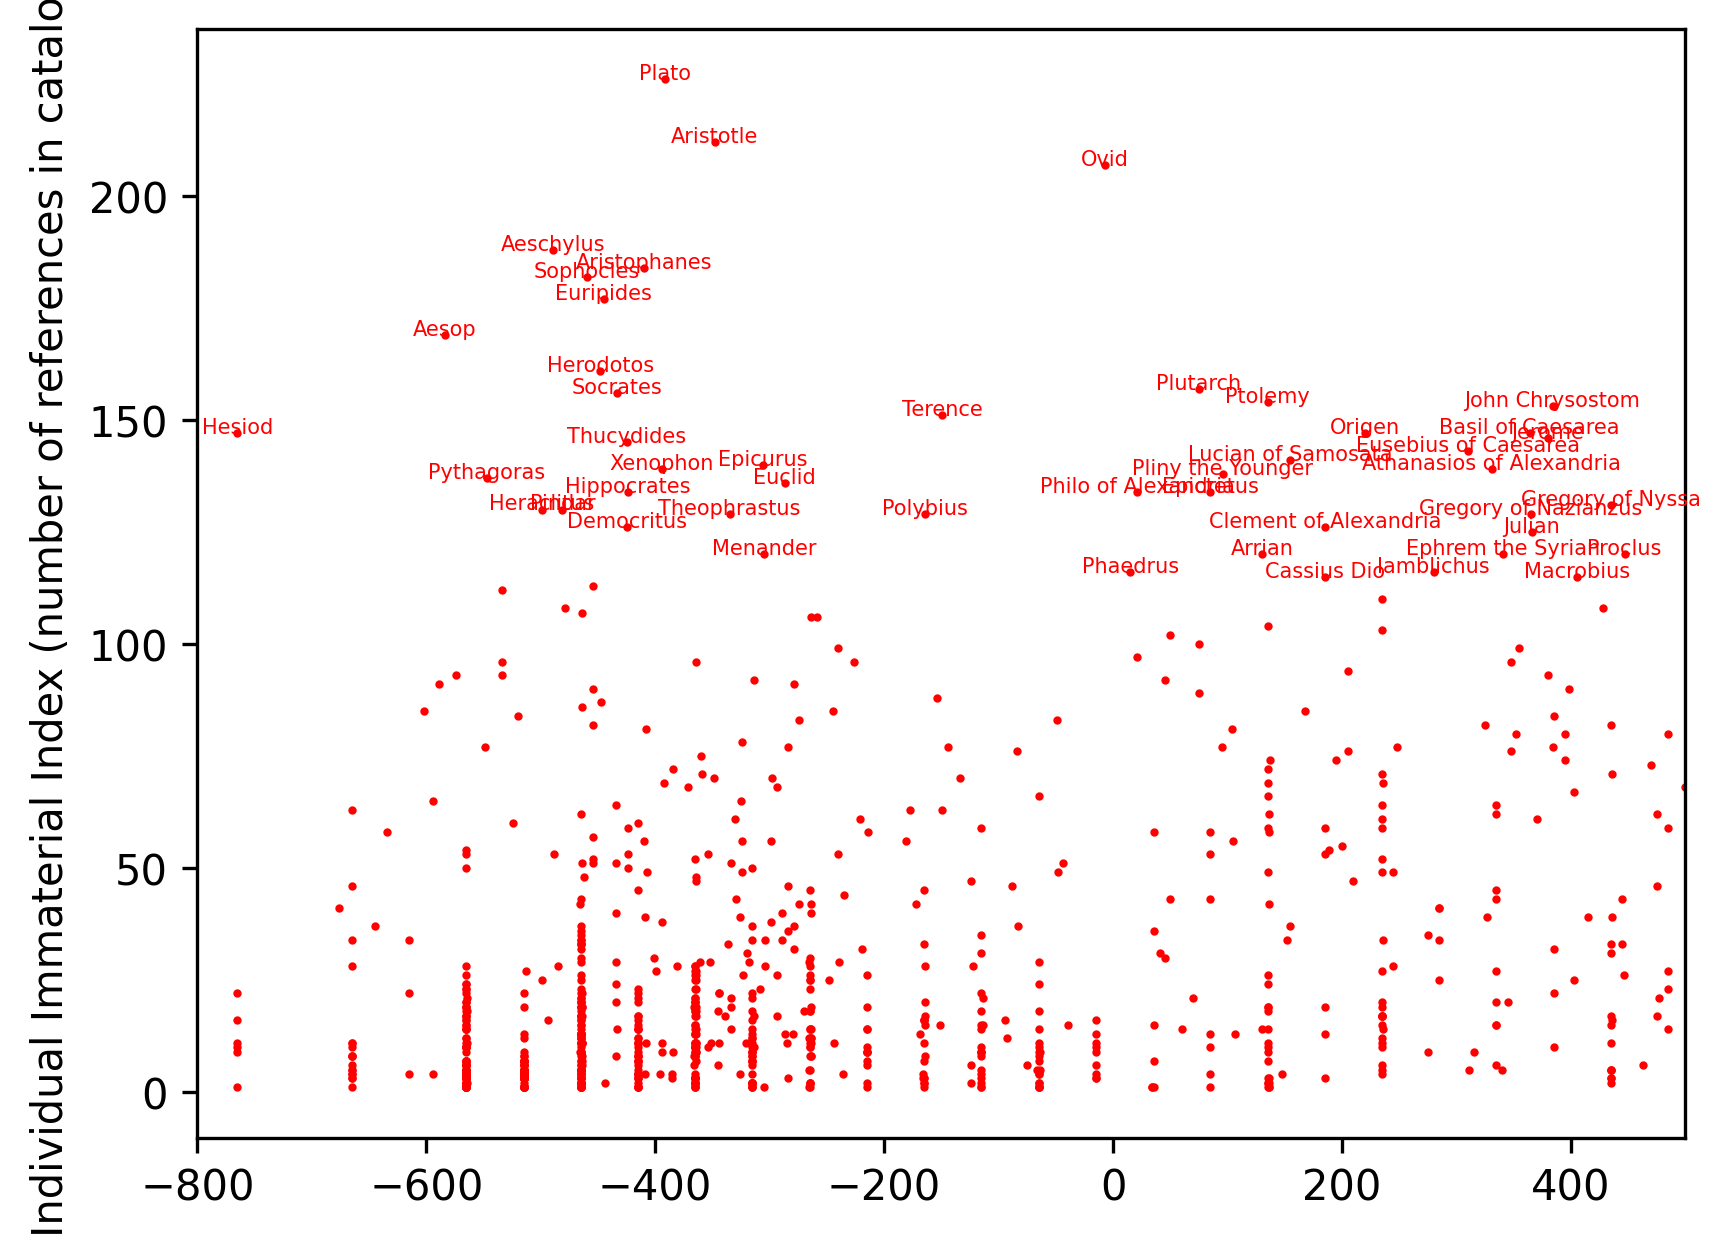

In [195]:
fig, ax = plt.subplots(dpi=300)
max = cultura_greek_world["identifier_score"].max()
plt.scatter(cultura_greek_world["birthyear_plus35"], cultura_greek_world["identifier_score"], color="red", s=1)
for i, txt in enumerate(cultura_greek_world["individual_name_x"]):
    if cultura_greek_world["identifier_score"].iloc[i] > (max/2):
        ax.annotate(txt, (cultura_greek_world["birthyear_plus35"].iloc[i], cultura_greek_world["identifier_score"].iloc[i]), ha="center", fontsize=5, color="red")
ax.set_ylabel("Individual Immaterial Index (number of references in catalogs)")
ax.set_xlim(-800,500)

In [198]:
import seaborn as sns

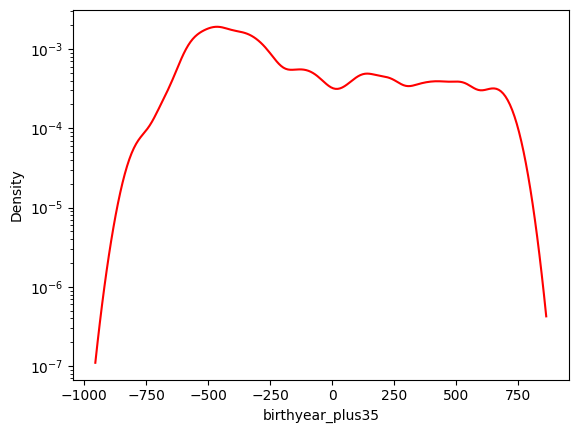

In [201]:
#sns.rugplot(cultura_greek_world['birthyear_plus35'], color='black')
# KDE plot with lowess smoothing
sns.kdeplot(cultura_greek_world['birthyear_plus35'], color='r', bw_adjust=0.5)

# Show the plot
plt.yscale('log')
plt.show()


In [196]:
cultura_greek_world.head(5)

,individual_wikidata_id,individual_name_x,birthyear,individual_impact_years,country_code,country_name,wikipedia_cultural_score,identifier_score,not_before,not_after,random_dates,birthyear_plus35,individual_name_y,region_code,region_name
301,Q1342867,Polykleitos the Younger,-400.0,-390--340,GRC,Greece,0.104834,11.0,-390,-340,"[-349, -380, -348, -379, -364, -356, -371, -34...",-365.0,Polykleitos the Younger,re_greek_world,Greek World
1066,Q197044,Zeuxis,-500.0,-490--440,GRC,Greece,0.116009,37.0,-490,-440,"[-469, -457, -477, -480, -451, -470, -442, -45...",-465.0,Zeuxis,re_greek_world,Greek World
2460,Q64320,Phradmon,-500.0,-490--440,GRC,Greece,0.102742,6.0,-490,-440,"[-448, -466, -471, -447, -449, -443, -470, -44...",-465.0,Phradmon,re_greek_world,Greek World
3079,Q298071,Hippodamus of Miletus,-497.0,-490--440,TUR,Turkey,0.119432,48.0,-490,-440,"[-444, -489, -488, -489, -449, -480, -449, -48...",-462.0,Hippodamus of Miletus,re_greek_world,Greek World
3632,Q332802,Ibycus,-600.0,-590--540,GRC,Greece,0.116928,53.0,-590,-540,"[-563, -582, -557, -549, -542, -560, -573, -54...",-565.0,Ibycus,re_greek_world,Greek World


In [23]:
# download and load the epigraphic data
try:
    LIST = gpd.read_parquet("large_files/LIST_v1-2.parquet")
    GIST = gpd.read_parquet("large_files/GIST_v1-1.parquet")
except:
    !curl https://zenodo.org/records/10473706/files/LIST_v1-2.parquet -o large_files/LIST_v1-2.parquet
    !curl https://zenodo.org/records/10139110/files/GIST_v1-1.parquet -o large_files/GIST_v1-1.parquet
    LIST = gpd.read_parquet("large_files/LIST_v1-2.parquet")
    GIST = gpd.read_parquet("large_files/GIST_v1-1.parquet")

In [59]:
print(len(GIST))
print(len(LIST))

217863
525870


In [60]:
GIST = GIST[GIST["is_geotemporal"]==True]
LIST = LIST[LIST["is_geotemporal"]==True]
print(len(GIST))
print(len(LIST))

106898
206570


In [24]:
LIST["random_dates"] = LIST.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=100), axis=1)
GIST["random_dates"] = GIST.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=100), axis=1)

In [61]:
greek_world_gdf = gpd.read_file("greek_world_gdf.geojson", driver="GeoJSON")
greek_world_uu = greek_world_gdf.geometry.unary_union

latin_world_gdf = gpd.read_file("latin_world_gdf.geojson", driver="GeoJSON")
latin_world_uu = latin_world_gdf.geometry.unary_union

(-8.144582351807436, 51.855417648192564, 6.267360648000015, 66.26736064800002)

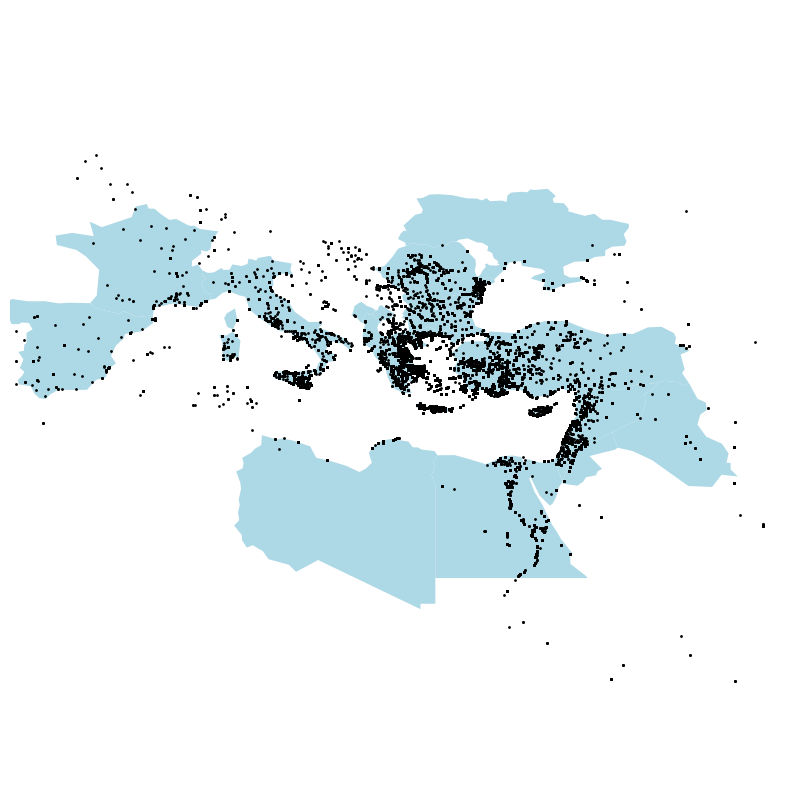

In [62]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_title(region_code)

greek_world_gdf.plot(ax=ax, color="lightblue")
GIST.plot(ax=ax, markersize=1, color="black")

# Calculate the centroid of the region's geometries
region_centroid = greek_world_gdf.geometry.unary_union.centroid
# Set the aspect ratio to be equal for a square plot
ax.set_aspect('equal')
# Set the map extent based on the region's centroid

n = 30
ax.set_xlim([region_centroid.x - n, region_centroid.x + n])
ax.set_ylim([region_centroid.y - n, region_centroid.y + n])

ax.axis('off')  # Hide the axis

(-26.91322221063255, 48.08677778936745, 7.571577037932457, 67.57157703793246)

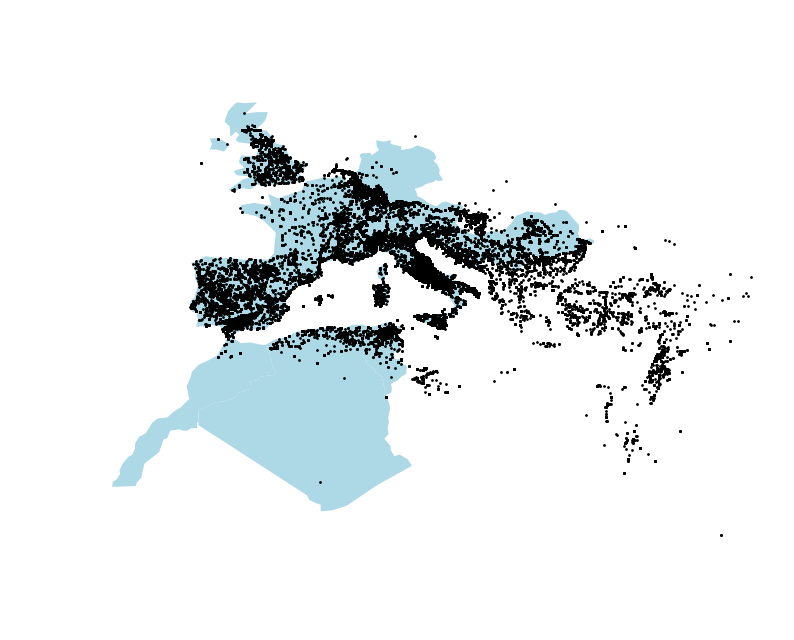

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_title(region_code)

latin_world_gdf.plot(ax=ax, color="lightblue")
LIST.plot(ax=ax, markersize=1, color="black")

# Calculate the centroid of the region's geometries
region_centroid = latin_world_gdf.geometry.unary_union.centroid
# Set the aspect ratio to be equal for a square plot
ax.set_aspect('equal')
# Set the map extent based on the region's centroid

n = 30
ax.set_xlim([region_centroid.x - n, region_centroid.x + n * 1.5])
ax.set_ylim([region_centroid.y - n, region_centroid.y + n])

ax.axis('off')  # Hide the axis